<a href="https://colab.research.google.com/github/son50git/PKT_004_Visualizaiton_PY_MTL/blob/master/PKT_004_Rework_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
sr = pd.Series([10, 25, 3, 11, 24, 6])
index_ = ['Coca Cola', 'Sprite', 'Coke', 'Fanta', 'Dew', 'ThumbsUp']
sr.index = index_
print(sr)
result = sr.rolling(2).sum()
print(result)

result = sr.rolling(2, min_periods=1).sum()
print(result)

Coca Cola    10
Sprite       25
Coke          3
Fanta        11
Dew          24
ThumbsUp      6
dtype: int64
Coca Cola     NaN
Sprite       35.0
Coke         28.0
Fanta        14.0
Dew          35.0
ThumbsUp     30.0
dtype: float64
Coca Cola    10.0
Sprite       35.0
Coke         28.0
Fanta        14.0
Dew          35.0
ThumbsUp     30.0
dtype: float64


In [30]:
from google.colab import drive, files
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
uploaded = files.upload()

Saving movie.csv to movie (1).csv


In [32]:
movie = pd.read_csv('movie.csv')
print(movie.shape)
print(movie.columns)
movie.head()

(4916, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [33]:
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
print(type(med_budget))
med_budget

<class 'pandas.core.series.Series'>


title_year
1916.0     0.385907
1920.0     0.100000
1925.0     0.245000
1927.0     6.000000
1929.0     0.379000
            ...    
2012.0    17.000000
2013.0    20.000000
2014.0    15.000000
2015.0    14.400000
2016.0    22.500000
Name: budget, Length: 91, dtype: float64

In [34]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()  # Provide rolling window calculations
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [35]:
print(med_budget.loc[2012:2016].mean()) # 17.78
print(med_budget.loc[2011:2015].mean()) # 17.98
print(med_budget.loc[2010:2014].mean()) # 19.10

17.78
17.98
19.1


In [36]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [37]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

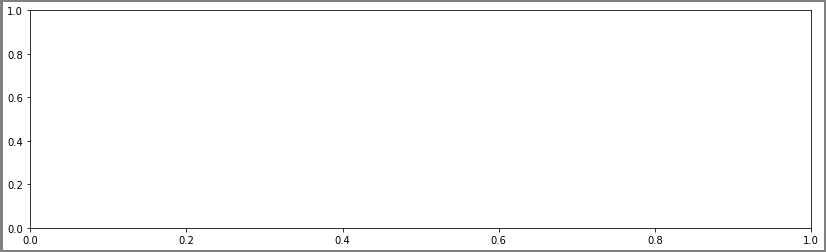

In [50]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
# ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
# text_kwargs=dict(fontsize=20, family='cursive')
# ax.set_title('Median Movie Budget', **text_kwargs)
# ax.set_ylabel('Millions of Dollars', **text_kwargs)

Text(0, 0.5, 'Millions of Dollars')

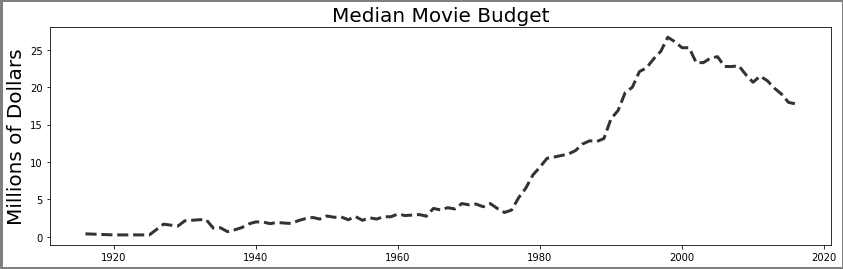

In [67]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [68]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [69]:
# print(type(movie_count)) # pandas.core.series.Series

ct = movie_count.values
# print(type(ct)) # numpy.ndarray
print(ct.max()) # 221

# budget = med_budget_roll.values  -- defined earlier
print(budget.max()) # 26.7

221
26.7


In [70]:
ct_norm = ct / ct.max() * budget.max()

print(ct[:10])
print(ct_norm[:10])

[1 1 1 1 1 1 1 2 1 1]
[0.12081448 0.12081448 0.12081448 0.12081448 0.12081448 0.12081448
 0.12081448 0.24162896 0.12081448 0.12081448]


In [55]:
print(type(years))
years

<class 'numpy.ndarray'>


array([1916., 1920., 1925., 1927., 1929., 1930., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

In [71]:
fifth_year = (years % 5 == 0) & (years >= 1970)
fifth_year
# years_5 = years[fifth_year]
# ct_5 = ct[fifth_year]
# ct_norm_5 = ct_norm[fifth_year]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False])

In [72]:
years_5 = years[fifth_year]
print(len(years_5))
print(years_5)
ct_5 = ct[fifth_year]
print(ct_5)
ct_norm_5 = ct_norm[fifth_year]
print(ct_norm_5)

10
[1970. 1975. 1980. 1985. 1990. 1995. 2000. 2005. 2010. 2015.]
[ 12   6  21  27  28  67 163 198 192 192]
[ 1.44977376  0.72488688  2.53710407  3.26199095  3.38280543  8.09457014
 19.69276018 23.92126697 23.19638009 23.19638009]


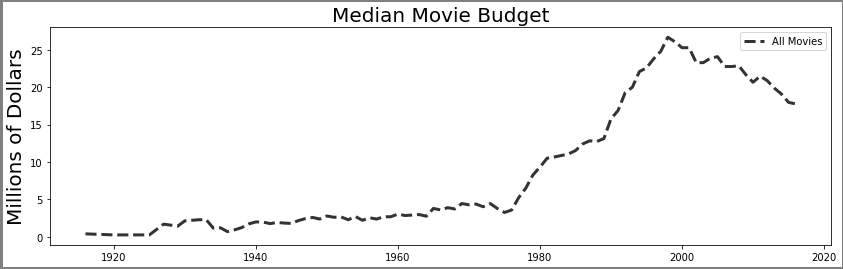

In [73]:
# ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax.legend()
fig

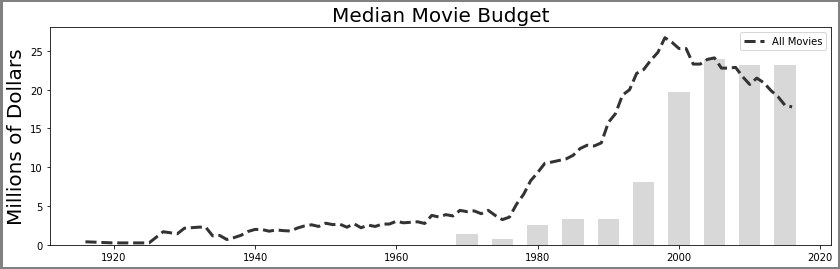

In [74]:
# Axes.bar(self, x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]
ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')

# ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
fig

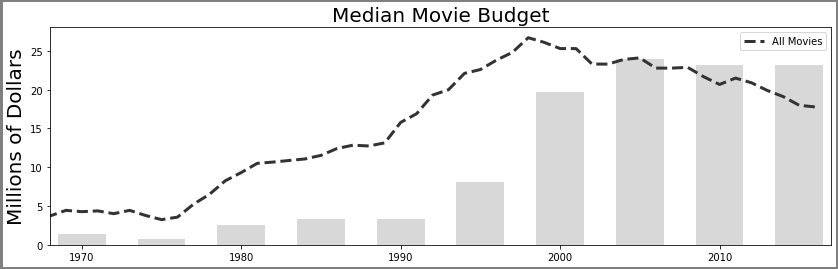

In [75]:
ax.set_xlim(1968, 2017)
fig

In [76]:
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    print(x)
    print(y)
    print(v)
    print()

1970.0
1.4497737556561086
12

1975.0
0.7248868778280543
6

1980.0
2.53710407239819
21

1985.0
3.2619909502262443
27

1990.0
3.382805429864253
28

1995.0
8.094570135746606
67

2000.0
19.692760180995474
163

2005.0
23.921266968325792
198

2010.0
23.196380090497737
192

2015.0
23.196380090497737
192



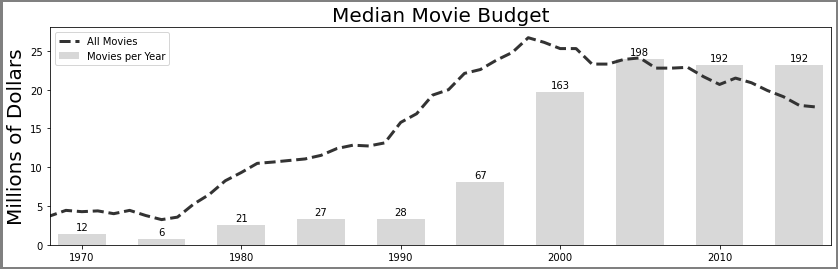

In [77]:
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + 0.5, str(v), ha='center') # ha='horizontal alignment' # ['center'|'right'|'left']
    # ax.text(str(v), ha='center') # ha='horizontal alignment' # ['center'|'right'|'left']
ax.legend()
fig